In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from SSNHL.util import load_data

In [2]:
raw_data = load_data('../raw_data/all.xlsx', preprocess_func=None)
raw_data

,sex,age,ear,day of onset,time of onset,vertigo,ear blockage,tinnitus,hypertension,diabetes,...,weight,BMI,mean hearing threshold(affected side),curve type(affected side),mean hearing threshold(contralateral),curve type(contralateral),revive(affected side),ABR,otoacoustic emission (500-6000Hz),efficacy evaluation
id,,,,,,,,,,,,,,,,,,,,,
1,0,27,L,3,0,0,0,1,0,0,...,59.2,23.714148,24.0,1,16.0,0.0,0.0,0.0,0.0,3
2,1,44,R,20,2,1,1,1,0,0,...,63.0,22.589551,200.0,4,11.0,0.0,0.0,NaN,1.0,0
3,1,25,R,5,0,1,0,1,0,0,...,56.7,19.619377,58.0,2,13.0,0.0,0.0,1.0,1.0,1
4,1,33,L,45,2,0,0,1,0,0,...,72.3,22.564839,19.0,1,13.0,0.0,0.0,0.0,NaN,3
5,0,63,L,3,0,0,0,1,1,1,...,68.5,28.147600,63.0,2,200.0,4.0,0.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1,33,L,6,0,0,1,1,0,0,...,73.4,22.159160,78.0,3,10.0,0.0,0.0,1.0,1.0,1
597,0,38,L,3,0,0,0,1,0,0,...,44.7,17.032465,18.0,1,11.0,0.0,0.0,0.0,0.0,3
598,0,43,R,7,0,1,0,1,0,0,...,63.8,25.556802,200.0,4,15.0,0.0,0.0,1.0,1.0,2


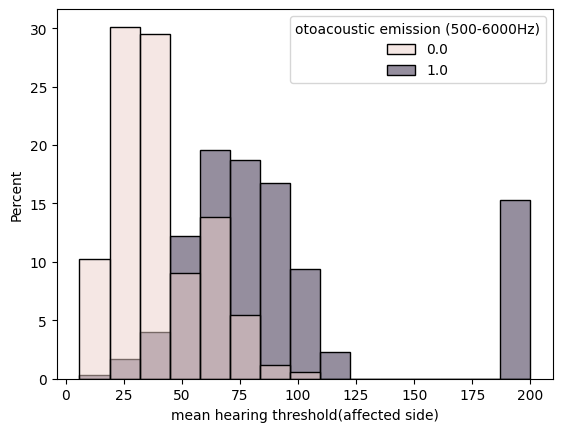

In [3]:
sns.histplot(raw_data, x='mean hearing threshold(affected side)', stat='percent', hue='otoacoustic emission (500-6000Hz)', bins=15, common_norm=False)
plt.savefig('../output/DPOAE_influence.pdf', bbox_inches="tight")
plt.show()

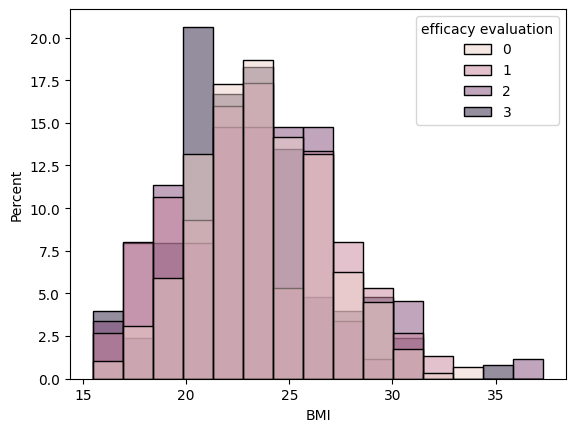

In [4]:
sns.histplot(raw_data, x='BMI', stat='percent', hue='efficacy evaluation', bins=15, common_norm=False)
plt.show()

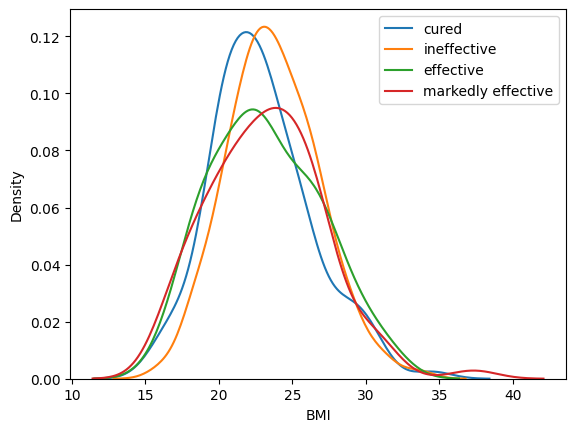

In [5]:
data = raw_data.copy()
data = data.fillna('-')

data.loc[data['efficacy evaluation'] == 0, 'efficacy evaluation'] = 'ineffective'
data.loc[data['efficacy evaluation'] == 1, 'efficacy evaluation'] = 'effective'
data.loc[data['efficacy evaluation'] == 2, 'efficacy evaluation'] = 'markedly effective'
data.loc[data['efficacy evaluation'] == 3, 'efficacy evaluation'] = 'cured'
 
data = data[(data['efficacy evaluation'] != '-') & (data['BMI'] != '-')]
for effect in data["efficacy evaluation"].unique():
    sns.kdeplot(data[data["efficacy evaluation"] == effect]["BMI"], label=effect)
plt.legend()
plt.savefig('../output/BMI_influence.pdf', bbox_inches="tight")
plt.show()